# Test the distance dataset to see if the model can distinguish

In [1]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
from tqdm import tqdm

# functions from other notebooks
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.models import classifier
# from ipynb.fs.full.generate_data import convert, visualize

Using TensorFlow backend.


Firstly, note that data has mass range: 10-100 (for m1 and m2), and distance range: 100-2000 Mpc 

This distance range is equivalent to SNR 7-1000 ish

# Data

In [2]:
# load data
f_path = 'c_distance_testdata.h5'
X = pd.read_hdf(f_path, 'X')
y = pd.read_hdf(f_path, 'y')

In [3]:
# Data preprocessing
X = np.asarray(X)
y = np.asarray(y)

In [4]:
# uniformly scale data
X=X*(10**22)

In [5]:
X_test = []
for i in np.arange(len(X)):
    h = X[i].reshape(4096,1)
    X_test.append(h)
X_test = np.asarray(X_test)

In [6]:
# one hot code y
y_test = to_categorical(y)

# Model performance

In [16]:
# load model
model = load_model('classify3B.h5')

In [17]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

29999/29999 [==============================] - 260s 9ms/step
Test loss: 2.564621174420598
Test accuracy: 0.7408246941564719


# Distribution of prediction

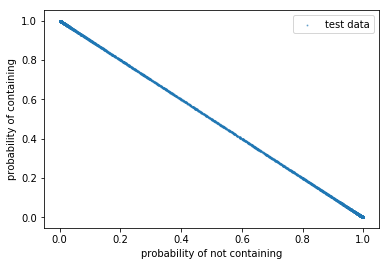

In [10]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

# Look into test set

In [11]:
import sys
sys.path.insert(0, '../functions')
from ipynb.fs.full.generate_data import convert, visualize

import pylab

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


  0%|          | 0/29999 [00:00<?, ?it/s]

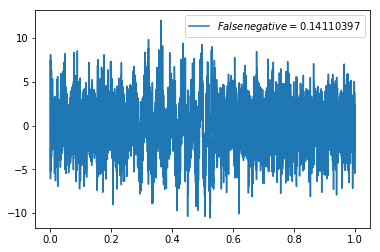

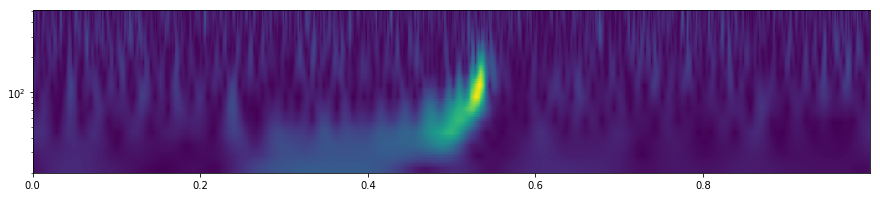

  0%|          | 4/29999 [00:04<8:57:35,  1.08s/it]

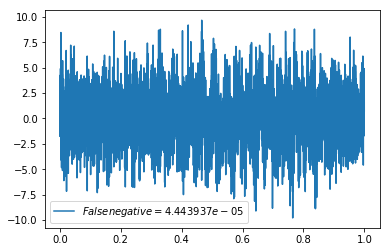

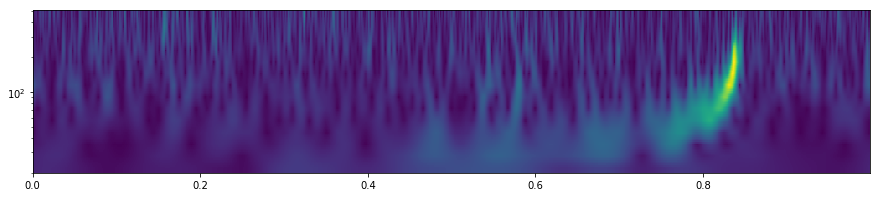

  0%|          | 8/29999 [00:05<7:05:09,  1.18it/s]

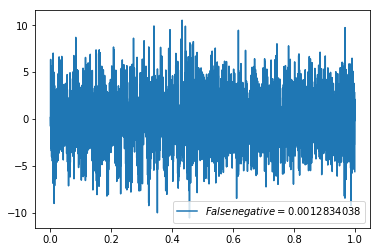

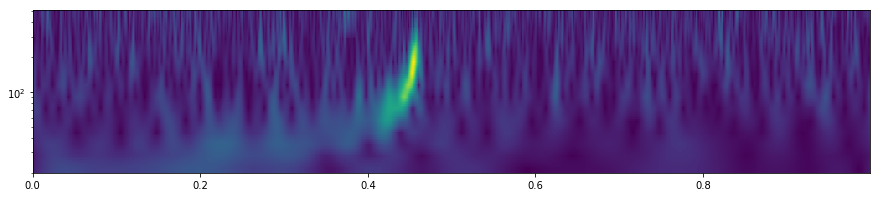

  0%|          | 9/29999 [00:06<8:04:24,  1.03it/s]

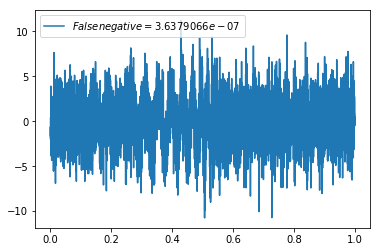

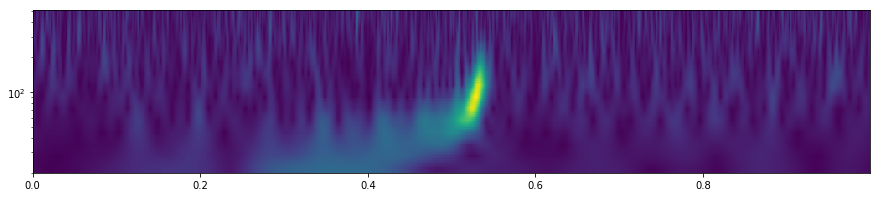

  0%|          | 11/29999 [00:08<7:38:06,  1.09it/s]

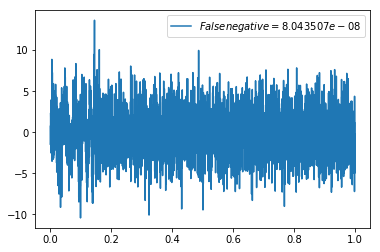

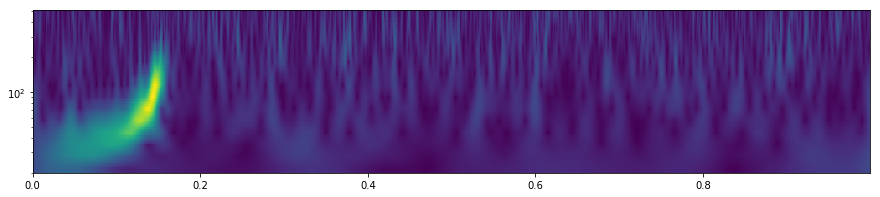

  0%|          | 15/29999 [00:10<6:20:13,  1.31it/s]

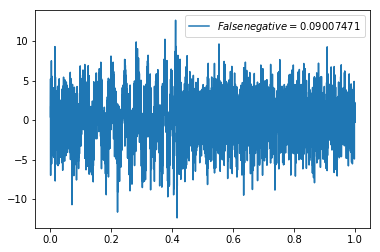

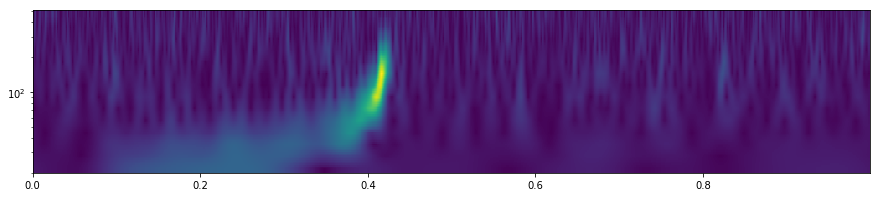

  0%|          | 16/29999 [00:11<8:49:24,  1.06s/it]

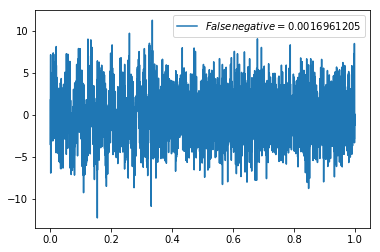

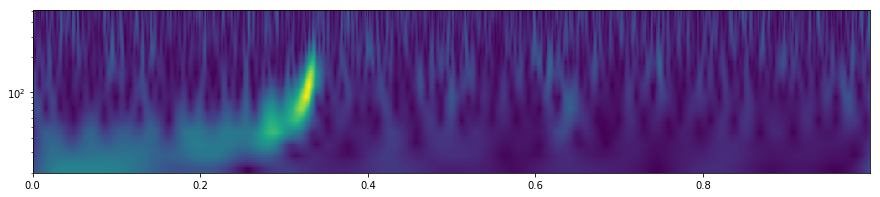

  0%|          | 24/29999 [00:13<6:36:17,  1.26it/s]

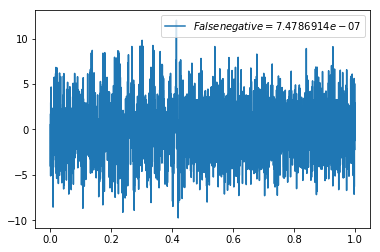

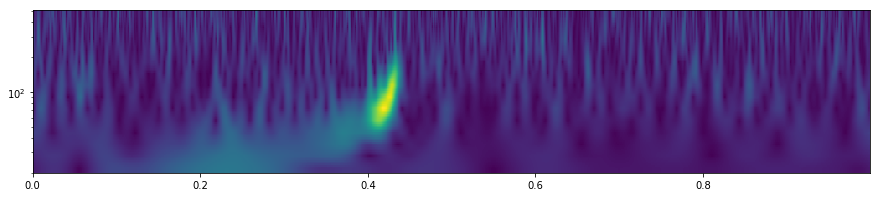

  0%|          | 26/29999 [00:14<6:18:19,  1.32it/s]

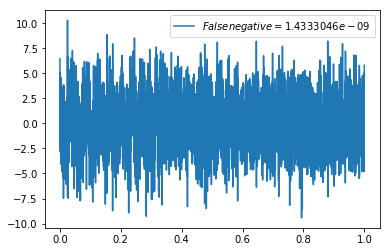

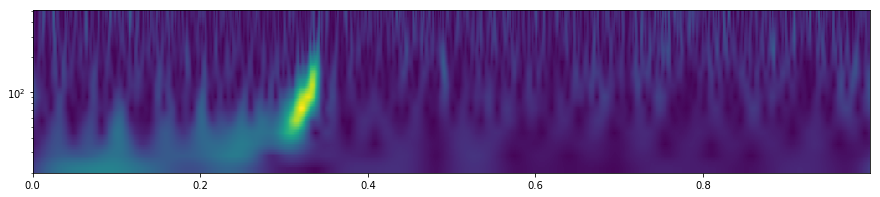

  0%|          | 30/29999 [00:16<5:28:22,  1.52it/s]

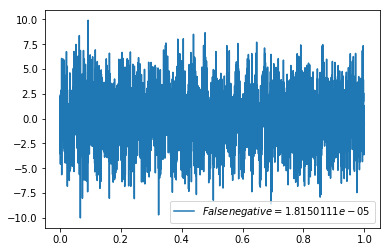

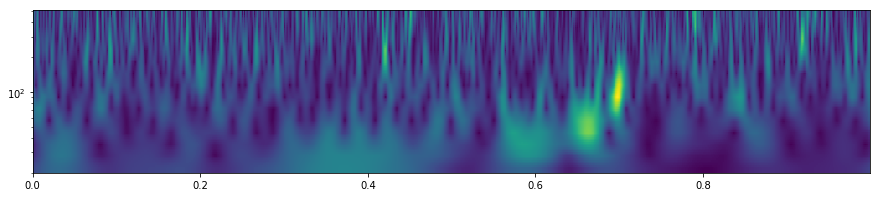

  0%|          | 31/29999 [00:17<7:59:47,  1.04it/s]

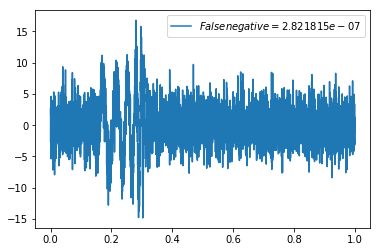

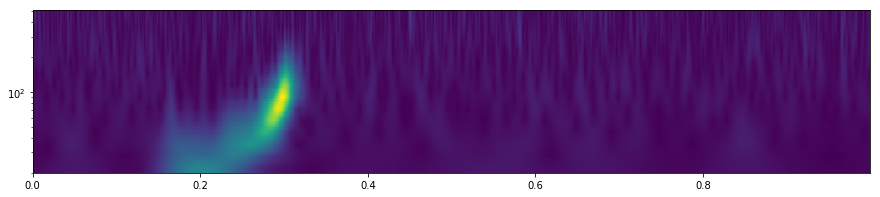

  0%|          | 32/29999 [00:19<8:44:42,  1.05s/it]

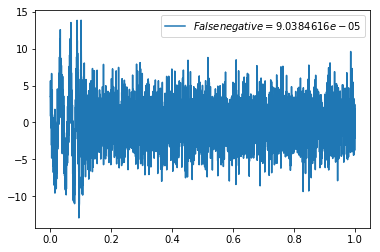

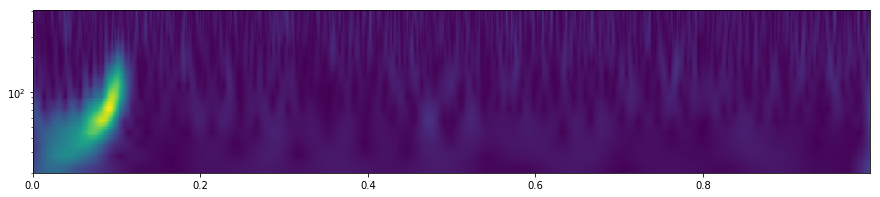

  0%|          | 39/29999 [00:20<6:30:24,  1.28it/s]

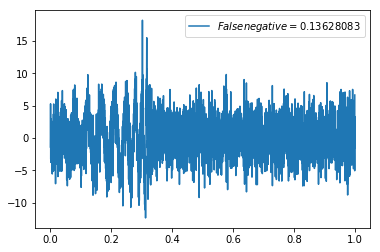

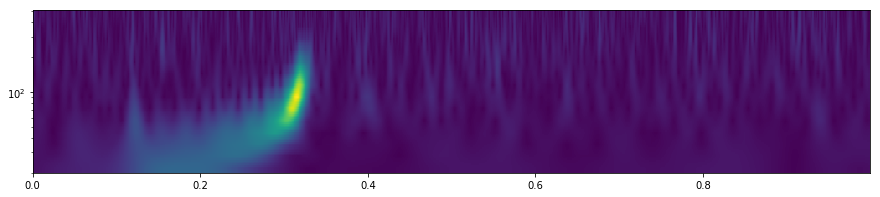

  0%|          | 49/29999 [00:21<4:51:17,  1.71it/s]

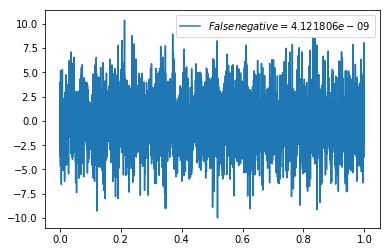

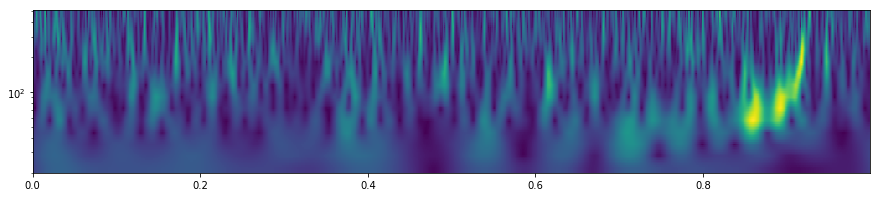

  0%|          | 68/29999 [00:22<3:34:42,  2.32it/s]

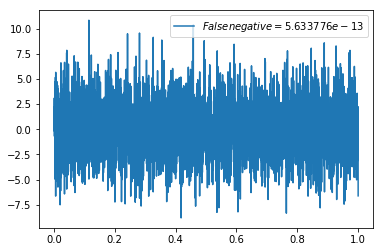

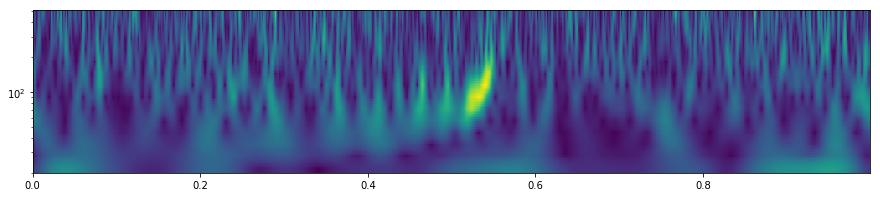

  0%|          | 69/29999 [00:24<5:48:37,  1.43it/s]

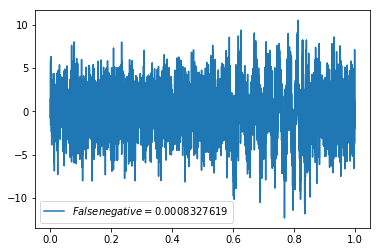

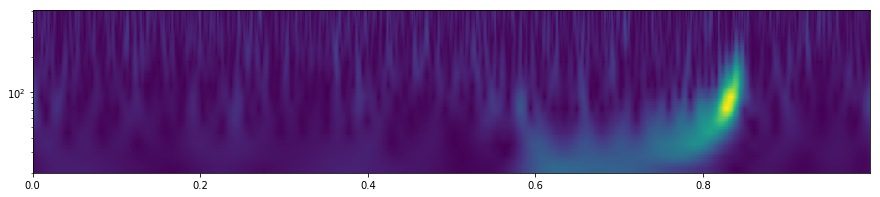

  0%|          | 71/29999 [00:25<5:46:54,  1.44it/s]

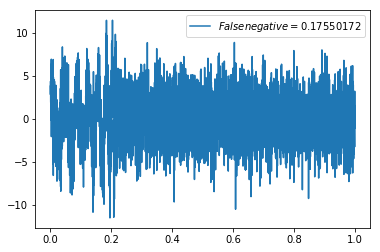

KeyboardInterrupt: 

In [13]:
# find wrong predictions in test set

false_negative = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and y[i][0]==1:
        false_negative += 1
        falneg_wf = convert(X[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falneg_wf)
        
print("False negative: ", false_negative)


false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and y[i][0]==0:
        false_positive += 1
        falpos_wf = convert(X[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        visualize(falpos_wf)
        
print("False positive: ", false_positive)

In [10]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1
        unsure_wf = convert(Xtest[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos1[i] + ' actually '+ str(ytest[i]))
        pylab.legend()
        pylab.show()
        visualize(unsure_wf)

print("uncertained: ", uncertain_count)

100%|██████████| 1800/1800 [00:00<00:00, 163655.32it/s]

uncertained:  0
